In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


0.00, 0.00, 0.15, (0, 0), 6
-1.00, 0.00, 0.18, (-1, 0), 7
1.00, 0.00, 0.15, (1, 0), 6
0.00, 1.00, 0.15, (0, 1), 6
0.00, -1.00, 0.18, (0, -1), 7


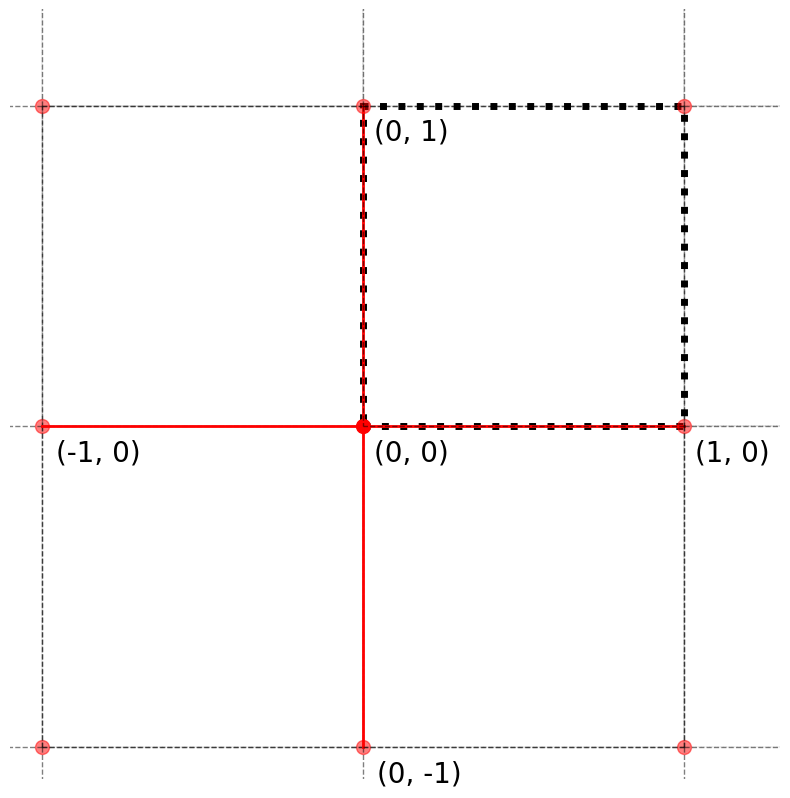

In [2]:
# square
lv1 = np.array([1, 0])  # Lattice vector 1 (x-direction)
lv2 = np.array([0, 1])  # Lattice vector 2 (y-direction)
lattice_points = [[0, 0, "A"]]  # [x, y, type]
neighbours = {"A": [[-1, 0], [1, 0], [0, 1], [0, -1]]}  # Left, Right, Up, Down

# Create figure (no borders/axes)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.axis('off')  # Hide axes

# Colors for atom types
colors = {"A": "red"}

def myround(num):
    if num.is_integer(): return int(num)
    else: return round(num, 3)

def write_text(px, py, offset):
    text = f"({myround(px)}, {myround(py)})"
    space_for_each_char = 0.05
    dx = space_for_each_char * len(text)/2
    print(f"{px:.2f}, {py:.2f}, {dx:.2f}, {text}, {len(text)}")
    ax.text(px+dx, py-offset, text, ha='center', va='center', fontsize=20, alpha=1.0)

# Plot 3x3 unit cells (9 total)
for i in range(-1, 2):
    for j in range(-1, 2):
        center_cell = (i == 0 and j == 0)
        # Dotted unit cell boundaries (thin lines)
        hex_cell = np.array([
            i*lv1 + j*lv2,
            (i+1)*lv1 + j*lv2,
            (i+1)*lv1 + (j+1)*lv2,
            i*lv1 + (j+1)*lv2,
            i*lv1 + j*lv2
        ])
        ax.add_patch(Polygon(hex_cell, closed=True, fill=False, 
                          linestyle=':', linewidth=5 if center_cell else 0.2, edgecolor='black', label="hilighted unit cell" if center_cell else None))

        # Plot lattice points (faded for outer cells)
        alpha = 1.0 if center_cell else 0.5  # Highlight center cell
        for (x, y, atom_type) in lattice_points:
            px, py = i*lv1 + j*lv2 + np.array([x, y])
            ax.scatter(px, py, color=colors[atom_type], s=100, alpha=alpha)

            offset = 0.1
            if center_cell:
                # ax.text(px, py + offset, atom_type, ha='center', va='center', fontsize=24, alpha=1.0)
                write_text(px, py, offset/1.2)
                
            # Mark neighbors (only for center cell)
            for (dx, dy) in neighbours[atom_type]:
                nx, ny = px + dx, py + dy
                ax.plot([px, nx], [py, ny], '-' if center_cell else '--', color=colors[atom_type] if center_cell else "k", 
                        alpha=alpha, linewidth=2 if center_cell else 1)
                if center_cell:
                    write_text(nx, ny, offset/1.2)

        # if center_cell:
        #     ax.text(px + 0.1, py + 0.1, f"({px:.2f}, {py:.2f})", ha='center', va='center', fontsize=10, alpha=1.0)
            
        

# ax.axhline(+0, color="k")
# ax.axhline(+1, color="k")
# ax.axhline(-1, color="k")
# ax.axvline(+0, color="k")
# ax.axvline(+1, color="k")
# ax.axvline(-1, color="k")

# Legend and title
# ax.legend(loc='upper right')
# plt.title("Hexagonal Lattice (Center Cell Highlighted)", pad=20)
plt.tight_layout()
# plt.show()
plt.xlim(-1.1, 1.3)
plt.ylim(-1.1, 1.3)
plt.savefig("squaregen.svg", bbox_inches='tight')

0.00, 0.00, 0.15, (0, 0), 6
1.00, 0.00, 0.15, (1, 0), 6
0.50, 0.87, 0.30, (0.5, 0.866), 12
-0.50, 0.87, 0.33, (-0.5, 0.866), 13
-1.00, 0.00, 0.18, (-1, 0), 7
-0.50, -0.87, 0.35, (-0.5, -0.866), 14
0.50, -0.87, 0.33, (0.5, -0.866), 13


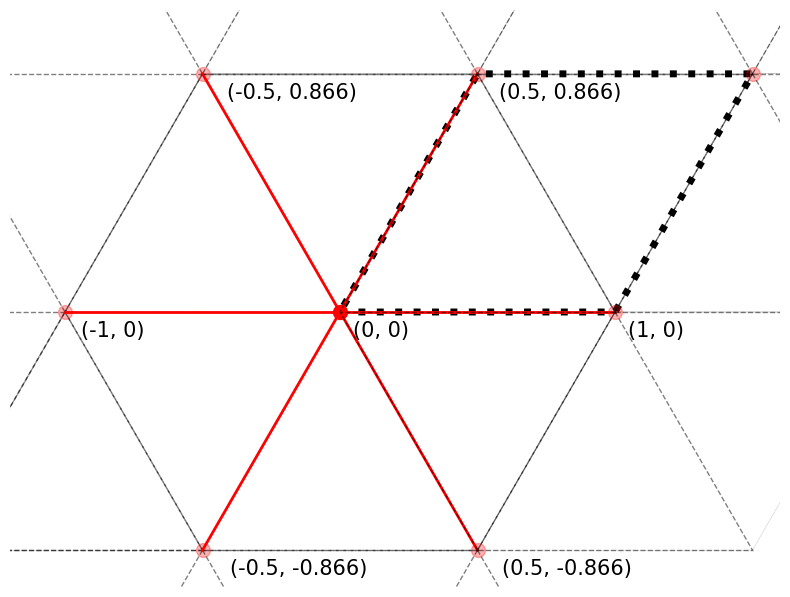

In [3]:
# triangle
lv1 = np.array([1, 0])  # Lattice vector in the x-direction
lv2 = np.array([0.5, np.sqrt(3) / 2])  # Lattice vector at 60 degrees
lattice_points = (
    [0, 0, "A"],
)
neighbours = {
    "A": [
        [1, 0],  # Right
        [0.5, np.sqrt(3) / 2],  # Right-up
        [-0.5, np.sqrt(3) / 2],  # Left-up
        [-1, 0],  # Left
        [-0.5, -np.sqrt(3) / 2],  # Left-down
        [0.5, -np.sqrt(3) / 2],  # Right-down
    ],
}

# Create figure (no borders/axes)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.axis('off')  # Hide axes

# Colors for atom types
colors = {"A": "red"}

def write_text(px, py, offset):
    text = f"({myround(px)}, {myround(py)})"
    space_for_each_char = 0.05
    dx = space_for_each_char * len(text)/2
    print(f"{px:.2f}, {py:.2f}, {dx:.2f}, {text}, {len(text)}")
    ax.text(px+dx, py-offset, text, ha='center', va='center', fontsize=15, alpha=1.0)

# Plot 3x3 unit cells (9 total)
for i in range(-1, 2):
    for j in range(-1, 2):
        center_cell = (i == 0 and j == 0)
        # Dotted unit cell boundaries (thin lines)
        hex_cell = np.array([
            i*lv1 + j*lv2,
            (i+1)*lv1 + j*lv2,
            (i+1)*lv1 + (j+1)*lv2,
            i*lv1 + (j+1)*lv2,
            i*lv1 + j*lv2
        ])
        ax.add_patch(Polygon(hex_cell, closed=True, fill=False, 
                          linestyle=':', linewidth=5 if center_cell else 0.2, edgecolor='black'))
                        #   linestyle='-' if center_cell else ':', linewidth=1.5 if center_cell else 0.5, edgecolor='black'))

        # Plot lattice points (faded for outer cells)
        alpha = 1.0 if center_cell else 0.3  # Highlight center cell
        for (x, y, atom_type) in lattice_points:
            px, py = i*lv1 + j*lv2 + np.array([x, y])
            ax.scatter(px, py, color=colors[atom_type], s=100, alpha=alpha)

            offset = 0.1
            if center_cell:
                # ax.text(px, py + offset, atom_type, ha='center', va='center', fontsize=24, alpha=1.0)
                write_text(px, py, offset/1.5)
                
            # Mark neighbors (only for center cell)
            for (dx, dy) in neighbours[atom_type]:
                nx, ny = px + dx, py + dy
                ax.plot([px, nx], [py, ny], '-' if center_cell else '--', color=colors[atom_type] if center_cell else "k", 
                        alpha=1 if center_cell else 0.5, linewidth=2 if center_cell else 1)
                if center_cell:
                    write_text(nx, ny, offset/1.5)

        # if center_cell:
        #     ax.text(px + 0.1, py + 0.1, f"({px:.2f}, {py:.2f})", ha='center', va='center', fontsize=10, alpha=1.0)
            
        

# ax.axhline(+0, color="k")
# ax.axhline(+1, color="k")
# ax.axhline(-1, color="k")
# ax.axvline(+0, color="k")
# ax.axvline(+1, color="k")
# ax.axvline(-1, color="k")

# Legend and title
# ax.legend(loc='upper right', title="Atom Types")
# plt.title("Hexagonal Lattice (Center Cell Highlighted)", pad=20)
plt.tight_layout()
# plt.show()
plt.xlim(-1.2, 1.6)
plt.ylim(-1, 1.1)
plt.savefig("trianglegen.svg", bbox_inches='tight')

0.00, 0.00, 0.16, (0, 0), 6
0.00, 0.58, 0.23, (0, 0.577), 10
-0.50, -0.29, 0.30, (-0.5, -0.289), 14
0.50, -0.29, 0.28, (0.5, -0.289), 13
1.00, 0.58, 0.23, (1, 0.577), 10
1.50, 0.87, 0.26, (1.5, 0.866), 12
0.50, 0.87, 0.26, (0.5, 0.866), 12
1.00, 0.00, 0.16, (1, 0), 6


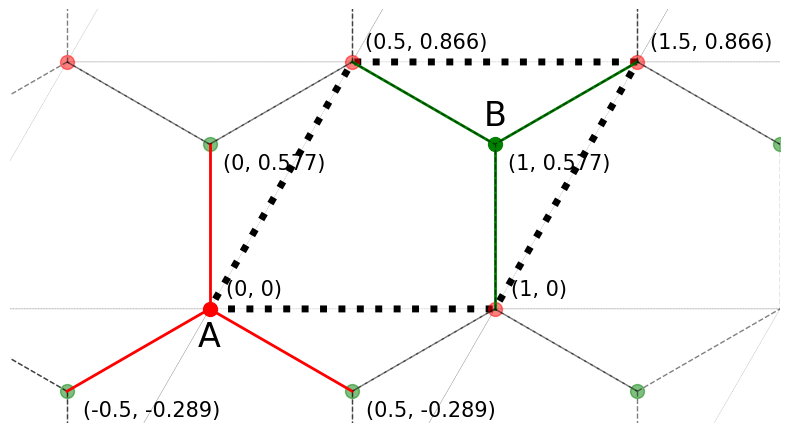

In [6]:

lv1 = np.array([1, 0])  # Lattice vector 1 (x-direction)
lv2 = np.array([0.5, np.sqrt(3) / 2])  # Lattice vector 2 (hexagonal)
lattice_points = [
    [0, 0, "A"],  # Center unit cell point A
    [1, 1/np.sqrt(3), "B"]  # Center unit cell point B (shifted for hexagon)
]
neighbours = {
    "A": [
        [0, 1/np.sqrt(3)], 
        [-0.5, -1/(2*np.sqrt(3))], 
        [0.5, -1/(2*np.sqrt(3))]
    ],
    "B": [
        [0.5, 1/(2*np.sqrt(3))], 
        [-0.5, 1/(2*np.sqrt(3))], 
        [0, -1/np.sqrt(3)]
    ]
}


# Create figure (no borders/axes)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.axis('off')  # Hide axes

# Colors for atom types
colors = {"A": "red", "B": "green"}

def write_text(px, py, offset):
    text = f"({myround(px)}, {myround(py)})"
    space_for_each_char = 0.035
    dx = space_for_each_char * len(text)/2 + 0.05
    print(f"{px:.2f}, {py:.2f}, {dx:.2f}, {text}, {len(text)}")
    ax.text(px+dx, py-offset, text, ha='center', va='center', fontsize=15, alpha=1.0)

# Plot 3x3 unit cells (9 total)
for i in range(-1, 2):
    for j in range(-1, 2):
        center_cell = (i == 0 and j == 0)
        # Dotted unit cell boundaries (thin lines)
        hex_cell = np.array([
            i*lv1 + j*lv2,
            (i+1)*lv1 + j*lv2,
            (i+1)*lv1 + (j+1)*lv2,
            i*lv1 + (j+1)*lv2,
            i*lv1 + j*lv2
        ])
        ax.add_patch(Polygon(hex_cell, closed=True, fill=False, 
                          linestyle=':', linewidth=5 if center_cell else 0.2, edgecolor='black'))
                        #   linestyle='-' if center_cell else ':', linewidth=1.5 if center_cell else 0.5, edgecolor='black'))

        # Plot lattice points (faded for outer cells)
        alpha = 1.0 if center_cell else 0.5  # Highlight center cell
        for (x, y, atom_type) in lattice_points:
            px, py = i*lv1 + j*lv2 + np.array([x, y])
            ax.scatter(px, py, color=colors[atom_type], s=100, alpha=alpha)

            offset = -0.1 if atom_type == "A" else 0.1
            if center_cell:
                ax.text(px, py + offset, atom_type, ha='center', va='center', fontsize=24, alpha=1.0)
                write_text(px, py, offset/1.5)
                
            # Mark neighbors (only for center cell)
            for (dx, dy) in neighbours[atom_type]:
                nx, ny = px + dx, py + dy
                ax.plot([px, nx], [py, ny], '-' if center_cell else '--', color=colors[atom_type] if center_cell else "k", 
                        alpha=1 if center_cell else 0.5, linewidth=2 if center_cell else 1)
                if center_cell:
                    write_text(nx, ny, -offset/1.5)

        # if center_cell:
        #     ax.text(px + 0.1, py + 0.1, f"({px:.2f}, {py:.2f})", ha='center', va='center', fontsize=10, alpha=1.0)

        

# ax.axhline(+0, color="k")
# ax.axhline(+1, color="k")
# ax.axhline(-1, color="k")
# ax.axvline(+0, color="k")
# ax.axvline(+1, color="k")
# ax.axvline(-1, color="k")

# Legend and title
# ax.legend(loc='upper right', title="Atom Types")
# plt.title("Hexagonal Lattice (Center Cell Highlighted)", pad=20)
plt.tight_layout()
# plt.show()
plt.xlim(-0.7, 2)
plt.ylim(-0.4, 1.05)
plt.savefig("hexagongen.svg", bbox_inches='tight')

0.00, 0.00, 0.16, (0, 0), 6
0.25, 0.43, 0.28, (0.25, 0.433), 13
-0.50, 0.00, 0.21, (-0.5, 0), 9
-0.25, -0.43, 0.31, (-0.25, -0.433), 15
0.50, 0.00, 0.19, (0.5, 0), 8
0.50, 0.00, 0.19, (0.5, 0), 8
0.00, 0.00, 0.16, (0, 0), 6
0.75, -0.43, 0.30, (0.75, -0.433), 14
1.00, 0.00, 0.16, (1, 0), 6
0.25, 0.43, 0.28, (0.25, 0.433), 13
0.25, 0.43, 0.28, (0.25, 0.433), 13
0.50, 0.00, 0.19, (0.5, 0), 8
0.50, 0.87, 0.26, (0.5, 0.866), 12
0.00, 0.87, 0.23, (0, 0.866), 10
0.00, 0.00, 0.16, (0, 0), 6


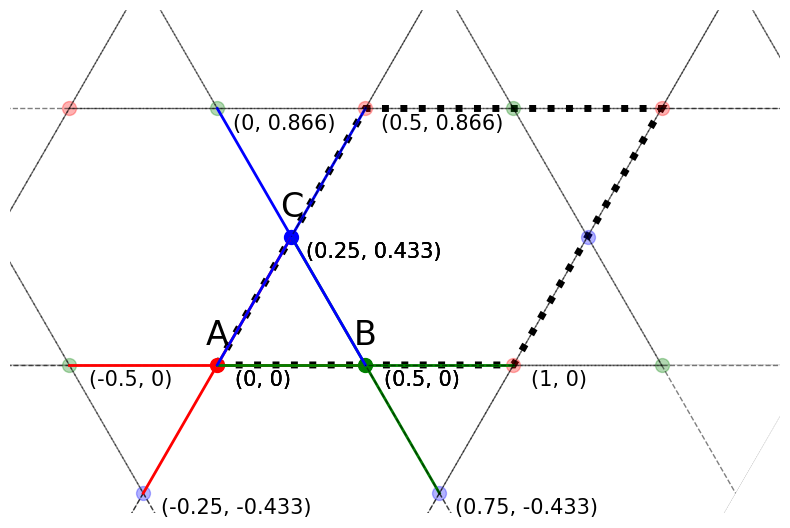

In [7]:
lv1 = np.array([1, 0])  # Lattice vector in the x-direction
lv2 = np.array([0.5, np.sqrt(3)/2])  # Lattice vector at 60 degrees

lattice_points = (
    [0, 0, "A"],
    [0.5, 0, "B"],
    [0.25, np.sqrt(3)/4, "C"],
)

neighbours = {
    "A": [
        [ 0.25,  np.sqrt(3)/4],  # Right-up
        [-0.5,              0],  # Left
        [-0.25, -np.sqrt(3)/4],  # Left-down
        [ 0.5,              0],  # Right
    ],
    "B": [
        [-0.5,              0],  # Left
        [ 0.25, -np.sqrt(3)/4],  # Right-down
        [ 0.5,              0],  # Right
        [-0.25,  np.sqrt(3)/4],  # Left-up
    ],
    "C": [
        [ 0.25, -np.sqrt(3)/4],  # Right-down
        [ 0.25,  np.sqrt(3)/4],  # Right-up
        [-0.25,  np.sqrt(3)/4],  # Left-up
        [-0.25, -np.sqrt(3)/4],  # Left-down
    ],
}

# Create figure (no borders/axes)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.axis('off')  # Hide axes

# Colors for atom types
colors = {"A": "red", "B": "green", "C": "blue"}

def write_text(px, py, offset):
    text = f"({myround(px)}, {myround(py)})"
    space_for_each_char = 0.035
    dx = space_for_each_char * len(text)/2 + 0.05
    print(f"{px:.2f}, {py:.2f}, {dx:.2f}, {text}, {len(text)}")
    ax.text(px+dx, py-offset, text, ha='center', va='center', fontsize=15, alpha=1.0)

# Plot 3x3 unit cells (9 total)
for i in range(-1, 2):
    for j in range(-1, 2):
        center_cell = (i == 0 and j == 0)
        # Dotted unit cell boundaries (thin lines)
        hex_cell = np.array([
            i*lv1 + j*lv2,
            (i+1)*lv1 + j*lv2,
            (i+1)*lv1 + (j+1)*lv2,
            i*lv1 + (j+1)*lv2,
            i*lv1 + j*lv2
        ])
        ax.add_patch(Polygon(hex_cell, closed=True, fill=False, 
                          linestyle=':', linewidth=5 if center_cell else 0.2, edgecolor='black'))
                        #   linestyle='-' if center_cell else ':', linewidth=1.5 if center_cell else 0.5, edgecolor='black'))

        # Plot lattice points (faded for outer cells)
        alpha = 1.0 if center_cell else 0.3  # Highlight center cell
        for (x, y, atom_type) in lattice_points:
            px, py = i*lv1 + j*lv2 + np.array([x, y])
            ax.scatter(px, py, color=colors[atom_type], s=100, alpha=alpha)

            offset = 0.1
            if center_cell:
                ax.text(px, py + offset, atom_type, ha='center', va='center', fontsize=24, alpha=1.0)
                write_text(px, py, offset/2)
                
            # Mark neighbors (only for center cell)
            for dx, dy in neighbours[atom_type]:
                nx, ny = px + dx, py + dy
                ax.plot([px, nx], [py, ny], '-' if center_cell else '--', color=colors[atom_type] if center_cell else "k", 
                        alpha=1 if center_cell else 0.5, linewidth=2 if center_cell else 1)
                if center_cell:
                    write_text(nx, ny, offset/2)

        # if center_cell:
        #     ax.text(px + 0.1, py + 0.1, f"({px:.2f}, {py:.2f})", ha='center', va='center', fontsize=10, alpha=1.0)
            
        

# ax.axhline(+0, color="k")
# ax.axhline(+1, color="k")
# ax.axhline(-1, color="k")
# ax.axvline(+0, color="k")
# ax.axvline(+1, color="k")
# ax.axvline(-1, color="k")

# Legend and title
# ax.legend(loc='upper right', title="Atom Types")
# plt.title("Hexagonal Lattice (Center Cell Highlighted)", pad=20)
plt.tight_layout()
# plt.show()
plt.xlim(-0.7, 1.9)
plt.ylim(-0.5, 1.2)
plt.savefig("kagomegen.svg", bbox_inches='tight')